In [1]:
%%time
import malaya

CPU times: user 11.7 s, sys: 1.34 s, total: 13.1 s
Wall time: 16.7 s


In [2]:
positive_text = 'Kerajaan negeri Kelantan mempersoalkan motif kenyataan Menteri Kewangan Lim Guan Eng yang hanya menyebut Kelantan penerima terbesar bantuan kewangan dari Kerajaan Persekutuan. Sedangkan menurut Timbalan Menteri Besarnya, Datuk Mohd Amar Nik Abdullah, negeri lain yang lebih maju dari Kelantan turut mendapat pembiayaan dan pinjaman.'
negative_text = 'kerajaan sebenarnya sangat bencikan rakyatnya, minyak naik dan segalanya'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is False.**

## Load multinomial model

In [3]:
model = malaya.sentiment.multinomial()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.27780816431771815, 'positive': 0.7221918356822792}
{'negative': 0.4230539695981826, 'positive': 0.5769460304018175}


[{'negative': 0.4230539695981826, 'positive': 0.5769460304018175},
 {'negative': 0.4230539695981826, 'positive': 0.5769460304018175}]

## Load xgb model

In [4]:
model = malaya.sentiment.xgb()
print(model.predict(positive_text,get_proba=True))
print(model.predict(negative_text,get_proba=True))
model.predict_batch([negative_text,negative_text],get_proba=True)

{'negative': 0.44467238, 'positive': 0.5553276}
{'negative': 0.47532737, 'positive': 0.5246726}


[{'negative': 0.47532737, 'positive': 0.5246726},
 {'negative': 0.47532737, 'positive': 0.5246726}]

## List available deep learning models

In [5]:
malaya.sentiment.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

## Load deep learning models

In [6]:
for i in malaya.sentiment.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.sentiment.deep_model(i)
    print(model.predict(negative_text))
    print(model.predict_batch([negative_text, positive_text]))
    print(model.predict_batch([negative_text, positive_text],get_proba=True))
    print()

Testing fast-text model
negative
['negative', 'positive']
[{'negative': 0.8494132, 'positive': 0.15058675}, {'negative': 0.04582213, 'positive': 0.95417786}]

Testing hierarchical model
positive
['positive', 'positive']
[{'negative': 0.11536069, 'positive': 0.88463926}, {'negative': 0.10003439, 'positive': 0.8999656}]

Testing bahdanau model
positive
['negative', 'positive']
[{'negative': 0.60403764, 'positive': 0.3959623}, {'negative': 0.5672228, 'positive': 0.43277723}]

Testing luong model
negative
['negative', 'positive']
[{'negative': 0.96496046, 'positive': 0.035039473}, {'negative': 0.08448372, 'positive': 0.91551626}]

Testing bidirectional model
positive
['positive', 'positive']
[{'negative': 0.17688204, 'positive': 0.82311803}, {'negative': 0.13394275, 'positive': 0.8660573}]

Testing bert model
negative
['negative', 'negative']
[{'negative': 0.992415, 'positive': 0.007585059}, {'negative': 0.9923813, 'positive': 0.0076187113}]

Testing entity-network model
negative
['negativ

## Unsupervised important words learning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

We need to set `get_proba` become True to get the 'attention'.

#### Visualizing bahdanau model

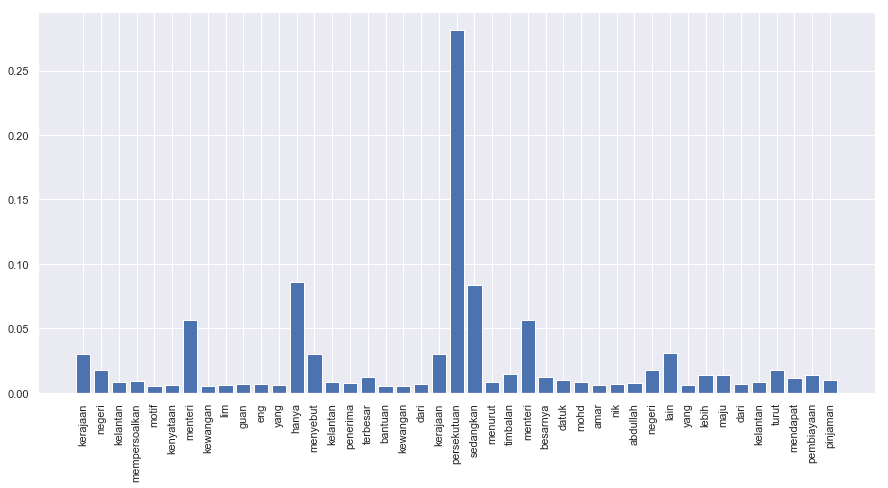

In [8]:
model = malaya.sentiment.deep_model('bahdanau')
result = model.predict(positive_text,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

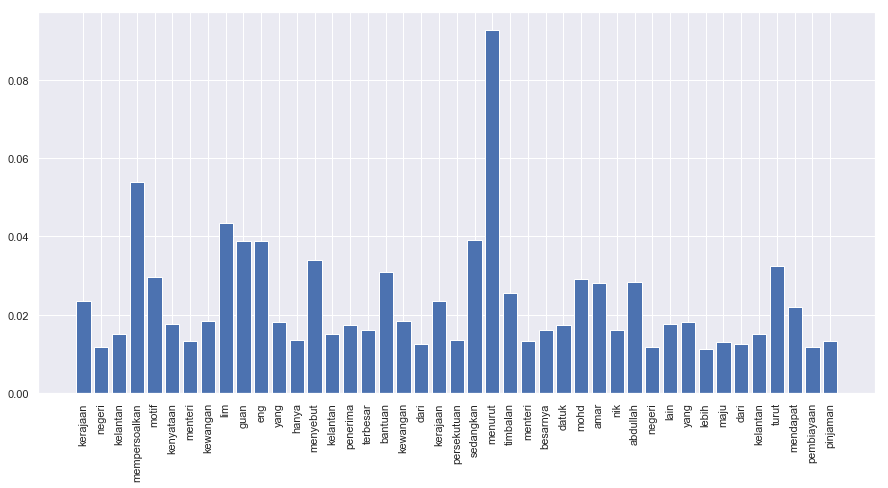

In [9]:
model = malaya.sentiment.deep_model('luong')
result = model.predict(positive_text,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

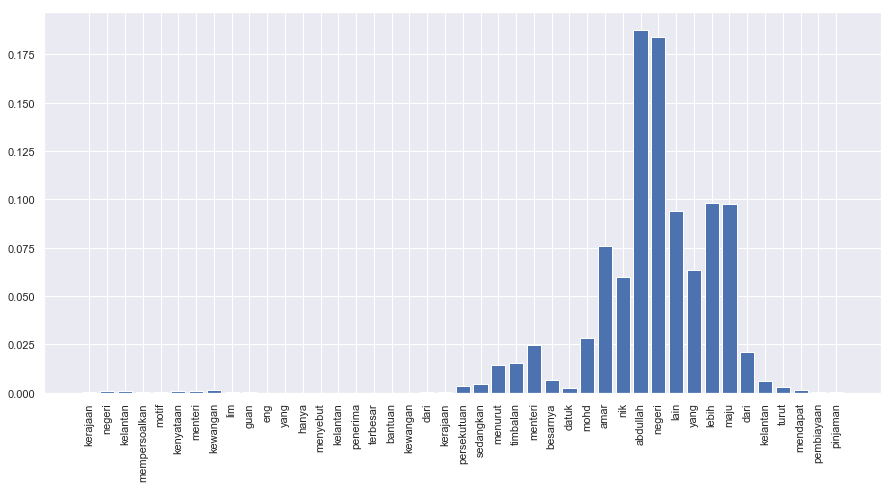

In [10]:
model = malaya.sentiment.deep_model('hierarchical')
result = model.predict(positive_text,get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [11]:
malaya.sentiment.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [12]:
sparse_model = malaya.sentiment.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/sentiment/fast-text-char/model.ckpt


In [13]:
sparse_model.predict(positive_text)

'positive'

In [14]:
sparse_model.predict_batch([positive_text, negative_text])

['positive', 'negative']

In [15]:
sparse_model.predict_batch([positive_text, negative_text],get_proba=True)

[{'negative': 0.38546535, 'positive': 0.6145346},
 {'negative': 0.50480145, 'positive': 0.49519858}]

**Not bad huh, but the polarity is not really high as word-based models. Word-based models can get negative / positive value really near to 1.0**

## Train a multinomial model using custom dataset

In [16]:
import pandas as pd
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

corpus should be [(text, label)]

In [17]:
dataset = [[df.iloc[i,0],df.iloc[i,1]] for i in range(df.shape[0])]
bayes = malaya.sentiment.train_multinomial(dataset)

             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        12
    Neutral       0.75      0.16      0.26        19
   Positive       0.53      1.00      0.69        30

avg / total       0.49      0.54      0.42        61



#### You also able to feed directory location

```
directory
    |
    |- adidas
    |- apple
    |- hungry
```

In [18]:
bayes = malaya.sentiment.train_multinomial('tests/local')

             precision    recall  f1-score   support

     adidas       0.97      0.60      0.74       303
      apple       0.99      0.57      0.73       477
     hungry       0.79      0.93      0.86      1051
   kerajaan       0.85      0.81      0.83      1403
       nike       0.96      0.53      0.68       329
pembangkang       0.71      0.87      0.78      1496

avg / total       0.82      0.80      0.79      5059



In [19]:
bayes.predict('saya suka kerajaan dan anwar ibrahim', get_proba = True)

{'adidas': 0.0005529039473579767,
 'apple': 0.0006348307032386134,
 'hungry': 0.010374347097919939,
 'kerajaan': 0.07250377012308745,
 'nike': 0.00058477543567546,
 'pembangkang': 0.9153493726927218}

#### Train a multinomial using skip-gram vectorization

In [20]:
bayes = malaya.sentiment.train_multinomial(
    'tests/local', vector = 'skip-gram', ngram_range = (1, 3), skip = 5
)

             precision    recall  f1-score   support

     adidas       0.36      0.86      0.51       301
      apple       0.50      0.87      0.63       482
     hungry       0.83      0.93      0.88      1046
   kerajaan       0.88      0.59      0.70      1358
       nike       0.56      0.81      0.66       321
pembangkang       0.89      0.55      0.68      1551

avg / total       0.78      0.70      0.71      5059



In [21]:
bayes.predict('saya suka kerajaan dan anwar ibrahim', get_proba = True)

{'adidas': 2.2801686476133734e-13,
 'apple': 7.228512692567908e-14,
 'hungry': 1.2286365803998912e-09,
 'kerajaan': 2.285014011490273e-06,
 'nike': 2.223604221487894e-13,
 'pembangkang': 0.9999977137568394}